# 벡터 스토어 (VectorStore)
- **벡터스토어 저장 단계는 Retrieval-Augmented Generation(RAG) 시스템의 네 번째 단계로, 이전 단계에서 생성된 임베딩 벡터들을 효율적으로 저장하고 관리하는 과정**
- **이 단계는 향후 검색 과정에서 벡터들을 빠르게 조회하고, 관련 문서를 신속하게 찾아내는 데 필수적**
- https://docs.langchain.com/oss/python/integrations/vectorstores/index

<br>

### 벡터스토어 저장의 필요성
- **빠른 검색 속도**: 임베딩 벡터들을 효과적으로 저장하고 색인화함으로써, 대량의 데이터 중에서도 관련된 정보를 빠르게 검색
- **스케일러빌리티**: 데이터가 지속적으로 증가함에 따라, 벡터스토어는 이를 수용할 수 있는 충분한 스케일러빌리티를 제공해야 함
  
  $\rightarrow$ 효율적인 저장 구조는 데이터베이스의 확장성을 보장하며, 시스템의 성능 저하 없이 대규모 데이터를 관리
- **의미 검색(Semantic Search) 지원**: 키워드 기반 검색이 아닌 사용자의 질문과 의미상으로 유사한 단락을 조회해야하는데, 벡터스토어는 이러한 기능을 지원
  - 텍스트 자체가 저장되는 DB의 경우 키워드 기반 검색에 의존해야 하는 한계성이 있지만, 벡터스토어는 의미적으로 유사한 단락 검색을 가능

<br>

### 벡터스토어 중요성
- **벡터스토어 저장 단계는 RAG 시스템의 검색 기능과 직접적으로 연결되어 있으며, 전체 시스템의 응답 시간과 정확성에 큰 영향**

<br>

<hr>

<br>

## Chroma
* Chroma는 AI 네이티브 오픈 소스 벡터 데이터베이스 (Chroma는 Apache 2.0에 따라 라이선스가 부여)
- https://docs.trychroma.com/docs/overview/getting-started

<br>

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from langchain_community.document_loaders import TextLoader
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma

In [4]:
# 텍스트 분할
text_splitter = RecursiveCharacterTextSplitter(chunk_size=600, chunk_overlap=0)

# 텍스트 파일을 load -> List[Document] 형태로 변환
loader1 = TextLoader("data/appendix-keywords.txt")
loader2 = TextLoader("data/chain-of-density.txt")

# 문서 분할
split_doc1 = loader1.load_and_split(text_splitter)
split_doc2 = loader2.load_and_split(text_splitter)

# 문서 개수 확인
len(split_doc1), len(split_doc2)

(11, 7)

<br>

### VectorStore 생성

<br>

#### 벡터 저장소 생성 (`from_documents`)
- **단일 텍스트**로부터 벡터 저장소를 생성

<br>

- **`documents`** (List[Document]): 벡터 저장소에 추가할 문서 리스트
- **`embedding`** (Optional[Embeddings]): 임베딩 함수. (기본값은 None)
- **`ids`** (Optional[List[str]]): 문서 ID 리스트. (기본값은 None)
- **`collection_name`** (str): 생성할 컬렉션 이름.
- **`persist_directory`** (Optional[str]): 컬렉션을 저장할 디렉토리. (기본값은 None)
  - 값이 지정되면 컬렉션이 해당 디렉토리에 저장. 지정되지 않으면 데이터는 메모리에 임시로 저장
- **`client_settings`** (Optional[chromadb.config.Settings]): Chroma 클라이언트 설정
- **`client`** (Optional[chromadb.Client]): Chroma 클라이언트 인스턴스
- **`collection_metadata`** (Optional[Dict]): 컬렉션 구성 정보. (기본값은 None)

<br>

- 문서를 디스크에 저장. 
- 저장시 `persist_directory`에 저장할 경로를 지정

In [12]:
DB_PATH = "./chroma_db"

persist_db = Chroma.from_documents(
    split_doc1, 
    OpenAIEmbeddings(), 
    persist_directory=DB_PATH, collection_name="my_db"
)

* 저장된 데이터를 로드

In [13]:
persist_db = Chroma(
    persist_directory=DB_PATH,
    embedding_function=OpenAIEmbeddings(),
    collection_name="my_db",
)

In [14]:
persist_db.get()

{'ids': ['2a7b0578-06f8-43e7-a63f-06453852394b',
  '578c6d5a-ea6e-4758-bcf2-a926d7eebb6f',
  'e1541004-e8c7-49c4-a46e-8402b8b022aa',
  '1e69d408-16f3-4d73-a0eb-6e56d0642dd4',
  '4afd2bd0-175a-4a79-95ff-6b59057625bc',
  'cb2aa866-4ea7-4bc9-8ab6-c6cde69edc89',
  'cabbae7a-9c67-48e0-bb62-0d4f33b7d491',
  'ba229a3f-d2d9-4bf0-ac4a-37ff906d829e',
  '2ae5edbe-0f11-4cbb-8ef3-def5906eb7dc',
  'bb020dad-565a-4edd-98c3-1bc14090d0d0',
  '42c22e6b-4de2-4c47-baaa-18031cc70974',
  'e99da679-ff9b-4034-a7ec-7fb267256710',
  '0fb1c230-b2d2-4d47-8361-0ef0aed9a624',
  '8df9f321-53a5-4ff0-8c80-f0d36ee37dbc',
  '427f8665-221e-4150-9029-110d9a14675b',
  'bebd8886-4acf-4954-8db8-0b7d1ad9215b',
  '8b3df3b2-72ac-4bba-aae8-92b2f0c5ebb4',
  '9ced4d0a-55de-4d65-abcc-f47e6328bbd6',
  'b9b8c6ec-a50a-42e9-9a21-71adaa389ac4',
  'a08181f6-11fc-40c6-b29c-379e70fea210',
  '29bfeca6-1ed6-4a0d-a7f0-cf3d003034a9',
  '6d0068f4-959c-4514-9fb2-79f6278cf90d'],
 'embeddings': None,
 'documents': ['Semantic Search\n\n정의: 의미론적 검색은

<br>

#### 벡터 저장소 생성 (`from_texts`)
- **텍스트 리스트**로부터 벡터 저장소를 생성

<br>

- `texts` (List[str]): 컬렉션에 추가할 텍스트 리스트
- `embedding` (Optional[Embeddings]): 임베딩 함수. (기본값은 None)
- `metadatas` (Optional[List[dict]]): 메타데이터 리스트. (기본값은 None)
- `ids` (Optional[List[str]]): 문서 ID 리스트. (기본값은 None)
  - `ids`가 제공되지 않으면 UUID를 사용하여 자동으로 생성
- `collection_name` (str): 생성할 컬렉션 이름. (기본값은 `'_LANGCHAIN_DEFAULT_COLLECTION_NAME'`)
- `persist_directory` (Optional[str]): 컬렉션을 저장할 디렉토리. (기본값은 None)
- `client_settings` (Optional[chromadb.config.Settings]): Chroma 클라이언트 설정
- `client` (Optional[chromadb.Client]): Chroma 클라이언트 인스턴스
- `collection_metadata` (Optional[Dict]): 컬렉션 구성 정보. (기본값은 None)


In [15]:
db2 = Chroma.from_texts(
    ["안녕하세요. 정말 반갑습니다.", "제 이름은 테디입니다."],
    embedding=OpenAIEmbeddings(),
)

In [16]:
db2.get()

{'ids': ['83b485f3-6e09-4a36-9302-5cbe2470265c',
  '8753a140-fa6f-412c-bc36-5d78c0f83cd4'],
 'embeddings': None,
 'documents': ['안녕하세요. 정말 반갑습니다.', '제 이름은 테디입니다.'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [None, None]}

<br>

### 유사도 검색 (`similarity_search`)
- 주어진 쿼리와 가장 유사한 문서들을 반환
- 점수 정보 없이 문서만 반환
    
    **점수 정보도 필요한 경우 `similarity_search_with_score` 메서드를 사용**

<br>

- `query` (str): 검색할 쿼리 텍스트
- `k` (int, 선택적): 반환할 결과의 수. (기본값은 4)
  - `k` 값을 조절하여 원하는 수의 결과를 조절
- `filter` (Dict[str, str], 선택적): 메타데이터로 필터링. (기본값은 None)
  - `filter` 매개변수를 사용하여 특정 메타데이터 조건에 맞는 문서만 검색


In [19]:
db.similarity_search(
    "TF IDF 에 대하여 알려줘", filter={"source": "data/appendix-keywords.txt"}, k=2
)

[Document(id='26d3658c-a714-4a9d-9c5c-4df40852988b', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(id='1958c7e2-c210-4102-ba40-0c298038d685', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.\n예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.\n연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업\n\nStructured Data\n\n정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다

<br>

### 벡터 저장소에 문서 추가

<br>

#### `add_documents`
- 벡터 저장소에 문서를 추가하거나 업데이트
- `documents` (List[Document]): 벡터 저장소에 추가할 문서 리스트
- `ids`: 문서 ID 리스트 (제공 시 문서의 ID보다 우선함)

<br>


- `add_texts` 메서드가 구현되어 있어야 함
  - `add_texts` 메서드가 구현되지 않은 경우 $\rightarrow$ `NotImplementedError`
- `page_content`, `metadata`, `id` 지정
  - 문서의 `page_content는` 텍스트로, `metadata는` 메타데이터로 사용
- 문서에 ID가 있고 `kwargs`에 ID가 제공되지 않으면 문서의 ID가 사용

In [20]:
from langchain_core.documents import Document

In [21]:
db.add_documents(
    [
        Document(
            page_content="안녕하세요! 이번엔 도큐먼트를 새로 추가해 볼께요",
            metadata={"source": "mydata.txt"},
            id="1",
        )
    ]
)

['1']

- 추가된 문서 조회

In [22]:
db.get("1")

{'ids': ['1'],
 'embeddings': None,
 'documents': ['안녕하세요! 이번엔 도큐먼트를 새로 추가해 볼께요'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'source': 'mydata.txt'}]}

<br>

#### `add_documents`
- 텍스트를 임베딩하고 벡터 저장소에 추가

<br>

- `texts` (Iterable[str]): 벡터 저장소에 추가할 텍스트 리스트
- `metadatas` (Optional[List[dict]]): 메타데이터 리스트. (기본값은 None)
- `ids` (Optional[List[str]]): 문서 ID 리스트. (기본값은 None)

<br>

- `ids`가 제공되지 않으면 UUID를 사용하여 자동으로 생성
- 임베딩 함수가 설정되어 있으면 텍스트를 임베딩
- 메타데이터가 제공된 경우:
    - 메타데이터가 있는 텍스트와 없는 텍스트를 분리하여 처리
    - 메타데이터가 없는 텍스트의 경우 빈 딕셔너리
- 컬렉션에 `upsert` 작업을 수행하여 텍스트, 임베딩, 메타데이터를 추가

<br>

- 신규 데이터를 추가
  - 기존의 `id=1`의 데이터는 덮어쓰기

<br>



In [ ]:
db.add_texts(
    [
        "이전에 추가한 Document 를 덮어쓰겠습니다.", 
        "덮어쓴 결과가 어떤가요?"
    ],
    metadatas=[
        {"source": "mydata.txt"}, 
        {"source": "mydata.txt"}
    ],
    ids=["1", "2"],
)

['1', '2']

In [24]:
db.get(["1"])

{'ids': ['1'],
 'embeddings': None,
 'documents': ['이전에 추가한 Document 를 덮어쓰겠습니다.'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'source': 'mydata.txt'}]}

<br>

#### `delete`
- 벡터 저장소에서 지정된 ID의 문서를 삭제

In [25]:
db.delete(ids=["1"])

db.get(["1", "2"])

{'ids': ['2'],
 'embeddings': None,
 'documents': ['덮어쓴 결과가 어떤가요?'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'source': 'mydata.txt'}]}

In [26]:
db.get(where={"source": "mydata.txt"})

{'ids': ['2'],
 'embeddings': None,
 'documents': ['덮어쓴 결과가 어떤가요?'],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': [{'source': 'mydata.txt'}]}

<br>

### 초기화(`reset_collection`)

In [27]:
db.reset_collection()

In [28]:
db.get()

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'included': ['metadatas', 'documents'],
 'data': None,
 'metadatas': []}

<br>

### 벡터 저장소를 검색기(Retriever)로 변환

<br>

#### `as_retriever`
-  벡터 저장소를 기반으로 `VectorStoreRetriever`를 생성
-  `**kwargs`: 검색 함수에 전달할 키워드 인자
-  `search_type` (Optional[str]): 검색 유형 (`"similarity"`, `"mmr"`, `"similarity_score_threshold"`)
-  `search_kwargs` (Optional[Dict]): 검색 함수에 전달할 추가 인자
   - `k`: 반환할 문서 수 (기본값: 4)
   - `score_threshold`: 최소 유사도 임계값
   - `fetch_k`: MMR 알고리즘에 전달할 문서 수 (기본값: 20)
   - `lambda_mult`: MMR 결과의 다양성 조절 (0~1, 기본값: 0.5)
   - `filter`: 문서 메타데이터 필터링

In [29]:
db = Chroma.from_documents(
    documents=split_doc1 + split_doc2,
    embedding=OpenAIEmbeddings(),
    collection_name="nlp",
)

- MMR 알고리즘

In [31]:
retriever = db.as_retriever(
    search_type="mmr", search_kwargs={"k": 6, "lambda_mult": 0.25, "fetch_k": 10}
)
retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(id='b0e9be3c-07a5-4f33-8de7-2515650e8fd9', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source'),
 Document(id='ae1f1a03-2e21-4d7d-8f28-945fb2eae9d7', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색

- 특정 임계값 이상의 유사도

In [33]:
retriever = db.as_retriever(
    search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.8}
)

retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(id='b0e9be3c-07a5-4f33-8de7-2515650e8fd9', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source')]

- 특정 메타데이터 필터 적용

In [36]:
retriever = db.as_retriever(
    search_kwargs={"filter": {"source": "data/appendix-keywords.txt"}, "k": 2}
)
retriever.invoke("TF-IDF 에 대하여 알려줘")

[Document(id='ae1f1a03-2e21-4d7d-8f28-945fb2eae9d7', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(id='5a43fd97-2093-4873-8d7a-c63d7a637fa2', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.\n예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.\n연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업\n\nStructured Data\n\n정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다

<br>

### 멀티 모달 검색
- Chroma는 멀티모달 컬렉션, 즉 **여러 양식의 데이터를 포함하고 쿼리할 수 있는 컬렉션**을 지원
  
<br>



In [37]:
import os
from datasets import load_dataset
from matplotlib import pyplot as plt

# COCO 데이터셋 로드
dataset = load_dataset(
    path="detection-datasets/coco", name="default", split="train", streaming=True
)

README.md:   0%|          | 0.00/58.0 [00:00<?, ?B/s]

c:\Users\user\anaconda3\envs\lang_env\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\datasets--detection-datasets--coco. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

- 이미지 저장 폴더와 이미지 개수

In [38]:
IMAGE_FOLDER = "tmp"
N_IMAGES = 20

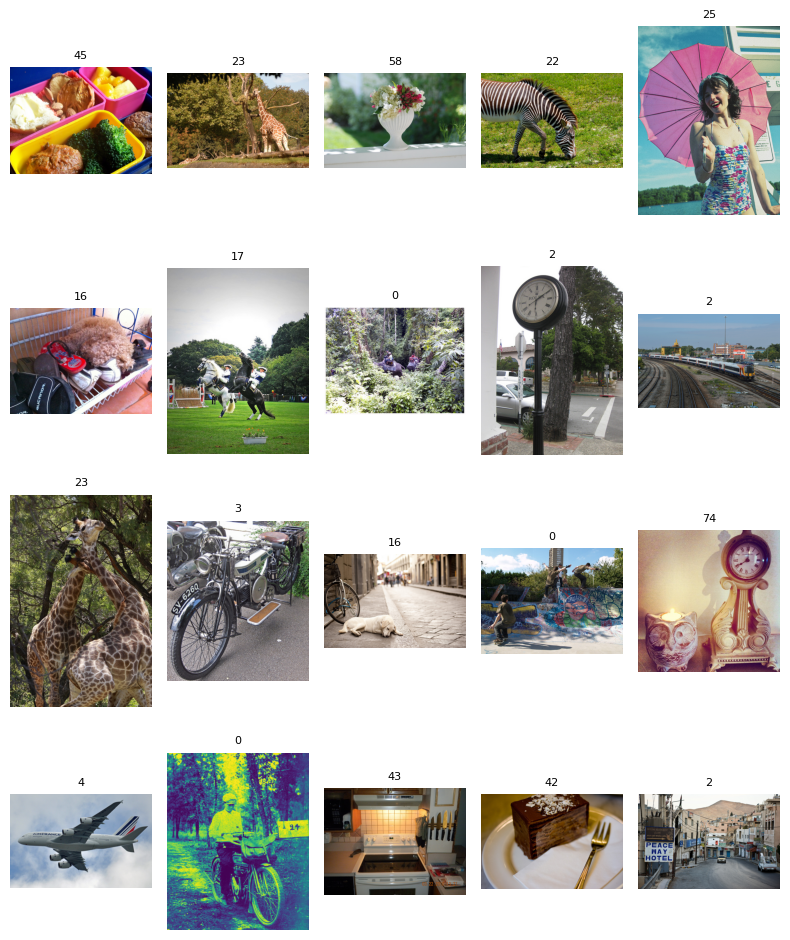

In [41]:
plot_cols = 5
plot_rows = N_IMAGES // plot_cols
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_rows * 2, plot_cols * 2))
axes = axes.flatten()

# 이미지를 폴더에 저장하고 그래프에 표시
dataset_iter = iter(dataset)
os.makedirs(IMAGE_FOLDER, exist_ok=True)

for i in range(N_IMAGES):
    # 데이터셋에서 이미지와 레이블 추출
    data = next(dataset_iter)
    image = data["image"]
    label = data["objects"]["category"][0]  # 첫 번째 객체의 카테고리를 레이블로 사용

    axes[i].imshow(image)
    axes[i].set_title(label, fontsize=8)
    axes[i].axis("off")

    image.save(f"{IMAGE_FOLDER}/{i}.jpg")
    
plt.tight_layout()
plt.show()

<br>

### Multimodal Embeddings
- Multimodal Embeddings 을 활용하여 이미지, 텍스트에 대한 Embedding 을 생성
- https://github.com/mlfoundations/open_clip/tree/main

<br>

- `model_name` 과 `checkpoint` 를 설정하여 사용
  - `model_name`: OpenCLIP 모델명
  - `checkpoint`: OpenCLIP 모델의 Training data 에 해당하는 이름

In [42]:
import open_clip
import pandas as pd

- 사용 가능한 모델/Checkpoint

In [43]:
pd.DataFrame(open_clip.list_pretrained(), columns=["model_name", "checkpoint"]).head(10)

,model_name,checkpoint
0,RN50,openai
1,RN50,yfcc15m
2,RN50,cc12m
3,RN101,openai
4,RN101,yfcc15m
5,RN50x4,openai
6,RN50x16,openai
7,RN50x64,openai
8,ViT-B-32,openai
9,ViT-B-32,laion400m_e31


<br>

- 이미지 임베딩 함수 로드

In [44]:
from langchain_experimental.open_clip import OpenCLIPEmbeddings

In [45]:
image_embedding_function = OpenCLIPEmbeddings(
    model_name="ViT-H-14-378-quickgelu", checkpoint="dfn5b"
)

open_clip_pytorch_model.bin:   0%|          | 0.00/3.95G [00:00<?, ?B/s]

c:\Users\user\anaconda3\envs\lang_env\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--apple--DFN5B-CLIP-ViT-H-14-378. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [46]:
image_uris = sorted(
    [
        os.path.join("tmp", image_name)
        for image_name in os.listdir("tmp")
        if image_name.endswith(".jpg")
    ]
)

image_uris

['tmp\\0.jpg',
 'tmp\\1.jpg',
 'tmp\\10.jpg',
 'tmp\\11.jpg',
 'tmp\\12.jpg',
 'tmp\\13.jpg',
 'tmp\\14.jpg',
 'tmp\\15.jpg',
 'tmp\\16.jpg',
 'tmp\\17.jpg',
 'tmp\\18.jpg',
 'tmp\\19.jpg',
 'tmp\\2.jpg',
 'tmp\\3.jpg',
 'tmp\\4.jpg',
 'tmp\\5.jpg',
 'tmp\\6.jpg',
 'tmp\\7.jpg',
 'tmp\\8.jpg',
 'tmp\\9.jpg']

- Vectorstore 생성 및 이미지 추가

In [61]:
image_db = Chroma(
    collection_name="multimodal",
    embedding_function=image_embedding_function,
)

In [62]:
image_db.add_images(uris=image_uris)

['54372db3-4dac-463c-9ab1-ddef350981c6',
 '6c5a4d9d-c7dd-459b-838f-d369d597f352',
 'aefedd9e-8fc4-4d35-92aa-3513cc6c63da',
 '98b0704b-3ec1-45f3-9bb4-c288ea7e28a7',
 '6a81c78a-0f11-40be-b206-dd87c43ab42a',
 'b9bec5f4-c4cc-4054-8255-08c6c06fcfe1',
 '59607772-7d26-4917-bf44-3d08ecbc937c',
 'e188c0b1-d1b9-4094-a669-934701f7a5ca',
 '01da6270-5168-4db6-9934-520d344ce86d',
 '154fe2c5-337c-42f0-89b1-c5b4c2072d1f',
 'bdbc167f-eb2d-415f-8818-59f78f46b281',
 '050cefa3-d456-46ce-b9f4-8eb00ac7b5d1',
 '3da94b94-bc99-4edb-be04-b7e9f7bbedf9',
 '73965f02-88bd-407c-ba29-651aebc91f1e',
 '48a1ae33-8be6-4dc7-a16e-10e40278f517',
 'da232048-dffa-4649-b878-d7055f209330',
 '5bb442d1-b72e-4750-8094-b00a837abd78',
 '14c92c73-1996-4c8f-8efe-50612e7cfbc0',
 '51cd7169-d5d7-4ee2-9a7b-55512badf9e1',
 '6a51fd4c-0a77-4be6-974c-26b3be0179a7']

<br>

<hr>

<br>

## FAISS
- Facebook AI Similarity Search (Faiss)는 밀집 벡터의 효율적인 유사도 검색과 클러스터링을 위한 라이브러리
- Faiss는 RAM에 맞지 않을 수도 있는 벡터 집합을 포함하여 모든 크기의 벡터 집합을 검색하는 알고리즘을 포함
- https://faiss.ai/
  
<br>

### VectorStore 생성
- `embedding_function` (Embeddings): 사용할 임베딩 함수
- `index` (Any): 사용할 FAISS 인덱스
- `docstore` (Docstore): 사용할 문서 저장소 
- `index_to_docstore_id` (Dict[int, str]): 인덱스에서 문서 저장소 ID로의 매핑

In [63]:
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_openai import OpenAIEmbeddings

In [64]:
embeddings = OpenAIEmbeddings()

dimension_size = len(embeddings.embed_query("hello world"))
print(dimension_size)

1536


In [65]:
db = FAISS(
    embedding_function=OpenAIEmbeddings(),
    index=faiss.IndexFlatL2(dimension_size),
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

<br>

### FAISS 벡터 저장소 생성 (`from_documents`)
- **문서 리스트**와 임베딩 함수를 사용하여 FAISS 벡터 저장소를 생성

<br>

- `documents` (List[Document]): 벡터 저장소에 추가할 문서 리스트
- `embedding` (Embeddings): 사용할 임베딩 함수
- `**kwargs`: 추가 키워드 인자

<br>

- 동작 방식
  - 문서 리스트에서 텍스트 내용(`page_content`)과 메타데이터를 추출
  - 추출한 텍스트와 메타데이터를 사용하여 `from_texts` 메서드를 호출

<br>

*  DB 생성

In [66]:
db = FAISS.from_documents(
    documents=split_doc1, 
    embedding=OpenAIEmbeddings()
)

- 문서 저장소 ID 확인

In [67]:
db.index_to_docstore_id

{0: '6ab62570-8b27-46f6-9bec-5fa4fb779750',
 1: 'f230dda6-afa7-4ec0-b82a-bd644237d05f',
 2: '6e1210d8-17c2-42ff-9bdd-3012c99b4ce6',
 3: '8b382343-3203-481c-bc4b-802d19332610',
 4: 'f0d8419a-638a-46a6-9588-1e0641429ccc',
 5: 'a62d9630-8170-4685-a09f-490682c30ab9',
 6: '82fd3752-be9d-495e-9bcf-a0b041c214d9',
 7: 'fbbf6bcc-2aad-4478-8e9a-9890c721953e',
 8: '3aaa805c-8ca3-4eb9-9ee3-5141db801e04',
 9: '235182a7-60eb-494f-8c91-834a47818a1a',
 10: '7b4958f0-f766-493c-ac2c-234f927314f5'}

- 저장된 문서의 ID: Document 확인

In [68]:
db.docstore._dict

{'6ab62570-8b27-46f6-9bec-5fa4fb779750': Document(id='6ab62570-8b27-46f6-9bec-5fa4fb779750', metadata={'source': 'data/appendix-keywords.txt'}, page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken\n\n정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.\n예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nTokenizer'),
 'f230dda6-afa7-4ec0-b82a-bd644237d05f': Document(id='f230dda6-afa7-4ec0-b82a-bd644237d05f', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: 토크나이저는 텍스트 데이터를 토큰으로 분할하는 도구입니다. 이는 자연어 처리에서 데이터를 전처리하는 데 사용됩니다.\n예시: "I love programming."이라는 문장을 ["I", "love", "programming", "."]으로 분할

<br>

### FAISS 벡터 저장소 생성 (`from_texts`)
- **텍스트 리스트**와 임베딩 함수를 사용하여 FAISS 벡터 저장소를 생성

<br>

- `texts` (List[str]): 벡터 저장소에 추가할 텍스트 리스트
- `embedding` (Embeddings): 사용할 임베딩 함수
- `metadatas` (Optional[List[dict]]): 메타데이터 리스트. (기본값은 None)
- `ids` (Optional[List[str]]): 문서 ID 리스트. (기본값은 None)
- `**kwargs`: 추가 키워드 인자

<br>

- 동작 방식
  - 제공된 임베딩 함수를 사용하여 텍스트를 임베딩
  - 임베딩된 벡터와 함께 `__from` 메서드를 호출하여 FAISS 인스턴스를 생성

In [69]:
db2 = FAISS.from_texts(
    ["안녕하세요. 정말 반갑습니다.", "제 이름은 테디입니다."],
    embedding=OpenAIEmbeddings(),
    metadatas=[{"source": "텍스트문서"}, {"source": "텍스트문서"}],
    ids=["doc1", "doc2"],
)

In [70]:
db2.docstore._dict

{'doc1': Document(id='doc1', metadata={'source': '텍스트문서'}, page_content='안녕하세요. 정말 반갑습니다.'),
 'doc2': Document(id='doc2', metadata={'source': '텍스트문서'}, page_content='제 이름은 테디입니다.')}

<br>

### 유사도 검색 (`similarity_search`)
- 주어진 쿼리와 가장 유사한 문서들을 반환
- 점수 정보 없이 문서만 반환
    
    **점수 정보도 필요한 경우 `similarity_search_with_score` 메서드를 사용**

<br>

- `query` (str): 유사한 문서를 찾기 위한 검색 쿼리 텍스트
- `k` (int): 반환할 문서 수. (기본값은 4)
- `filter` (Optional[Union[Callable, Dict[str, Any]]]): 메타데이터 필터링 함수 또는 딕셔너리. (기본값은 None)
  - `filter` 매개변수를 사용하여 메타데이터 기반의 필터링이 가능
- `fetch_k` (int): 필터링 전에 가져올 문서 수. (기본값은 20)
- `**kwargs`: 추가 키워드 인자
- **대규모 데이터셋에서는 `k`와 `fetch_k` 값을 적절히 조정하여 검색 속도와 정확도의 균형을 맞추는 것이 중요**
  
  (`fetch_k를` 너무 크게 설정하면 검색 속도가 느려짐)

<br>

- 동작 방식
  - `similarity_search_with_score` 메서드를 내부적으로 호출하여 유사도 점수와 함께 문서를 검색
  - 검색 결과에서 점수를 제외하고 문서만 추출하여 반환

In [73]:
db.similarity_search(
    "TF IDF 에 대하여 알려줘", filter={"source": "data/appendix-keywords.txt"}, k=2
)

[Document(id='82fd3752-be9d-495e-9bcf-a0b041c214d9', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(id='a62d9630-8170-4685-a09f-490682c30ab9', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.\n예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.\n연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업\n\nStructured Data\n\n정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다

<br>

#### `add_documents`
- 벡터 저장소에 문서를 추가하거나 업데이트

<br>

- `documents` (List[Document]): 벡터 저장소에 추가할 문서 리스트
- `**kwargs`: 추가 키워드 인자

<br>

- 동작 방식
  - 문서에서 텍스트 내용과 메타데이터를 추출
  - `add_texts` 메서드를 호출하여 실제 추가 작업을 수행

In [74]:
from langchain_core.documents import Document

In [75]:
db.add_documents(
    [
        Document(
            page_content="안녕하세요! 이번엔 도큐먼트를 새로 추가해 볼께요",
            metadata={"source": "mydata.txt"},
        )
    ],
    ids=["new_doc1"],
)

['new_doc1']

In [76]:
db.similarity_search("안녕하세요", k=1)

[Document(id='new_doc1', metadata={'source': 'mydata.txt'}, page_content='안녕하세요! 이번엔 도큐먼트를 새로 추가해 볼께요')]

<br>

#### `add_texts`
- 텍스트를 임베딩하고 벡터 저장소에 추가

<br>

- `texts` (Iterable[str]): 벡터 저장소에 추가할 텍스트 이터러블
- `metadatas` (Optional[List[dict]]): 텍스트와 연관된 메타데이터 리스트 (선택적)
- `ids` (Optional[List[str]]): 텍스트의 고유 식별자 리스트 (선택적)
- `**kwargs`: 추가 키워드 인자

<br>

- 동작 방식
  - 입력받은 텍스트 이터러블을 리스트로 변환
  - `_embed_documents` 메서드를 사용하여 텍스트를 임베딩
  - `__add` 메서드를 호출하여 임베딩된 텍스트를 벡터 저장소에 추가

In [78]:
db.add_texts(
    ["이번엔 텍스트 데이터를 추가합니다.", "추가한 2번째 텍스트 데이터 입니다."],
    metadatas=[{"source": "mydata.txt"}, {"source": "mydata.txt"}],
    ids=["new_doc2", "new_doc3"],
)

['new_doc2', 'new_doc3']

In [79]:
db.index_to_docstore_id

{0: '6ab62570-8b27-46f6-9bec-5fa4fb779750',
 1: 'f230dda6-afa7-4ec0-b82a-bd644237d05f',
 2: '6e1210d8-17c2-42ff-9bdd-3012c99b4ce6',
 3: '8b382343-3203-481c-bc4b-802d19332610',
 4: 'f0d8419a-638a-46a6-9588-1e0641429ccc',
 5: 'a62d9630-8170-4685-a09f-490682c30ab9',
 6: '82fd3752-be9d-495e-9bcf-a0b041c214d9',
 7: 'fbbf6bcc-2aad-4478-8e9a-9890c721953e',
 8: '3aaa805c-8ca3-4eb9-9ee3-5141db801e04',
 9: '235182a7-60eb-494f-8c91-834a47818a1a',
 10: '7b4958f0-f766-493c-ac2c-234f927314f5',
 11: 'new_doc1',
 12: 'new_doc2',
 13: 'new_doc3'}

<br>

#### `delete`
- 벡터 저장소에서 지정된 ID의 문서를 삭제

<br>

* `ids` (Optional[List[str]]): 삭제할 문서의 ID 리스트
* `**kwargs`: 추가 키워드 인자 (이 메서드에서는 사용되지 않음)

<br>

- 동작 방식
  - 입력된 ID의 유효성을 검사
  - 삭제할 ID에 해당하는 인덱스를 탐색
  - FAISS 인덱스에서 해당 ID를 제거
  - 문서 저장소에서 해당 ID의 문서를 삭제
  - 인덱스와 ID 매핑을 업데이트

In [80]:
ids = db.add_texts(
    ["삭제용 데이터를 추가합니다.", "2번째 삭제용 데이터입니다."],
    metadatas=[{"source": "mydata.txt"}, {"source": "mydata.txt"}],
    ids=["delete_doc1", "delete_doc2"],
)

In [81]:
ids

['delete_doc1', 'delete_doc2']

In [82]:
db.delete(ids)

True

In [83]:
db.index_to_docstore_id

{0: '6ab62570-8b27-46f6-9bec-5fa4fb779750',
 1: 'f230dda6-afa7-4ec0-b82a-bd644237d05f',
 2: '6e1210d8-17c2-42ff-9bdd-3012c99b4ce6',
 3: '8b382343-3203-481c-bc4b-802d19332610',
 4: 'f0d8419a-638a-46a6-9588-1e0641429ccc',
 5: 'a62d9630-8170-4685-a09f-490682c30ab9',
 6: '82fd3752-be9d-495e-9bcf-a0b041c214d9',
 7: 'fbbf6bcc-2aad-4478-8e9a-9890c721953e',
 8: '3aaa805c-8ca3-4eb9-9ee3-5141db801e04',
 9: '235182a7-60eb-494f-8c91-834a47818a1a',
 10: '7b4958f0-f766-493c-ac2c-234f927314f5',
 11: 'new_doc1',
 12: 'new_doc2',
 13: 'new_doc3'}

<br>

### 저장 및 로드

<br>

#### 로컬 저장 (`save_local`)
- FAISS 인덱스, 문서 저장소, 그리고 인덱스-문서 ID 매핑을 로컬 디스크에 저장하는 기능

<br>

- `folder_path` (str): 저장할 폴더 경로
- `index_name` (str): 저장할 인덱스 파일 이름 (기본값: "index")

<br>

- 동작 방식
  - 지정된 폴더 경로를 생성 (이미 존재하는 경우 무시).
  - FAISS 인덱스를 별도의 파일로 저장
  - 문서 저장소와 인덱스-문서 ID 매핑을 pickle 형식으로 저장

In [84]:
db.save_local(folder_path="faiss_db", index_name="faiss_index")

<br>

#### 로컬에서 불러오기 (`load_local`)
- 로컬 디스크에 저장된 FAISS 인덱스, 문서 저장소, 그리고 인덱스-문서 ID 매핑을 불러오는 기능

<br>

- `folder_path` (str): 불러올 파일들이 저장된 폴더 경로
- `embeddings` (Embeddings): 쿼리 생성에 사용할 임베딩 객체
- `index_name` (str): 불러올 인덱스 파일 이름 (기본값: "index")
- `allow_dangerous_deserialization` (bool): pickle 파일 역직렬화 허용 여부 (기본값: False)

In [85]:
loaded_db = FAISS.load_local(
    folder_path="faiss_db",
    index_name="faiss_index",
    embeddings=embeddings,
    allow_dangerous_deserialization=True,
)

In [86]:
loaded_db.index_to_docstore_id

{0: '6ab62570-8b27-46f6-9bec-5fa4fb779750',
 1: 'f230dda6-afa7-4ec0-b82a-bd644237d05f',
 2: '6e1210d8-17c2-42ff-9bdd-3012c99b4ce6',
 3: '8b382343-3203-481c-bc4b-802d19332610',
 4: 'f0d8419a-638a-46a6-9588-1e0641429ccc',
 5: 'a62d9630-8170-4685-a09f-490682c30ab9',
 6: '82fd3752-be9d-495e-9bcf-a0b041c214d9',
 7: 'fbbf6bcc-2aad-4478-8e9a-9890c721953e',
 8: '3aaa805c-8ca3-4eb9-9ee3-5141db801e04',
 9: '235182a7-60eb-494f-8c91-834a47818a1a',
 10: '7b4958f0-f766-493c-ac2c-234f927314f5',
 11: 'new_doc1',
 12: 'new_doc2',
 13: 'new_doc3'}

<br>

#### FAISS 객체 병합 (`merge_form`)
* 현재 FAISS 객체에 다른 FAISS 객체를 병합

<br>

- 동작 방식
  - 문서 저장소의 병합 가능 여부를 확인
  - 기존 인덱스의 길이를 기준으로 새로운 문서들의 인덱스를 설정
  - FAISS 인덱스를 병합
  - 대상 FAISS 객체의 문서와 ID 정보를 추출
  * 추출한 정보를 현재 문서 저장소와 인덱스-문서 ID 매핑에 추가

<br>

* 두 FAISS 객체의 인덱스, 문서 저장소, 인덱스-문서 ID 매핑을 모두 병합
* 인덱스 번호의 연속성을 유지하면서 병합
* 문서 저장소의 병합 가능 여부를 사전에 확인

In [88]:
db = FAISS.load_local(
    folder_path="faiss_db",
    index_name="faiss_index",
    embeddings=embeddings,
    allow_dangerous_deserialization=True,
)

db2 = FAISS.from_documents(
    documents=split_doc2, 
    embedding=OpenAIEmbeddings()
)

In [89]:
db.index_to_docstore_id, db2.index_to_docstore_id

({0: '6ab62570-8b27-46f6-9bec-5fa4fb779750',
  1: 'f230dda6-afa7-4ec0-b82a-bd644237d05f',
  2: '6e1210d8-17c2-42ff-9bdd-3012c99b4ce6',
  3: '8b382343-3203-481c-bc4b-802d19332610',
  4: 'f0d8419a-638a-46a6-9588-1e0641429ccc',
  5: 'a62d9630-8170-4685-a09f-490682c30ab9',
  6: '82fd3752-be9d-495e-9bcf-a0b041c214d9',
  7: 'fbbf6bcc-2aad-4478-8e9a-9890c721953e',
  8: '3aaa805c-8ca3-4eb9-9ee3-5141db801e04',
  9: '235182a7-60eb-494f-8c91-834a47818a1a',
  10: '7b4958f0-f766-493c-ac2c-234f927314f5',
  11: 'new_doc1',
  12: 'new_doc2',
  13: 'new_doc3'},
 {0: 'a28234c1-926d-429b-8fc7-b660d7e05cc5',
  1: '32bb2311-24f7-4550-a12f-5201fc892026',
  2: '7eb8cd03-e731-42ca-bd54-d89f08c58840',
  3: '4dac2238-b790-462b-9692-72095739ac00',
  4: '775db145-623d-4f90-8eb1-af94cd95a35d',
  5: '70fc184b-fb47-4d86-b3b2-1815ba57b987',
  6: 'f557042f-05f0-42c6-8996-38065e246bf6'})

- 병합

In [90]:
db.merge_from(db2)

In [91]:
db.index_to_docstore_id

{0: '6ab62570-8b27-46f6-9bec-5fa4fb779750',
 1: 'f230dda6-afa7-4ec0-b82a-bd644237d05f',
 2: '6e1210d8-17c2-42ff-9bdd-3012c99b4ce6',
 3: '8b382343-3203-481c-bc4b-802d19332610',
 4: 'f0d8419a-638a-46a6-9588-1e0641429ccc',
 5: 'a62d9630-8170-4685-a09f-490682c30ab9',
 6: '82fd3752-be9d-495e-9bcf-a0b041c214d9',
 7: 'fbbf6bcc-2aad-4478-8e9a-9890c721953e',
 8: '3aaa805c-8ca3-4eb9-9ee3-5141db801e04',
 9: '235182a7-60eb-494f-8c91-834a47818a1a',
 10: '7b4958f0-f766-493c-ac2c-234f927314f5',
 11: 'new_doc1',
 12: 'new_doc2',
 13: 'new_doc3',
 14: 'a28234c1-926d-429b-8fc7-b660d7e05cc5',
 15: '32bb2311-24f7-4550-a12f-5201fc892026',
 16: '7eb8cd03-e731-42ca-bd54-d89f08c58840',
 17: '4dac2238-b790-462b-9692-72095739ac00',
 18: '775db145-623d-4f90-8eb1-af94cd95a35d',
 19: '70fc184b-fb47-4d86-b3b2-1815ba57b987',
 20: 'f557042f-05f0-42c6-8996-38065e246bf6'}

<br>

### 검색기로 변환 (`as_retriever`)
- 현재 벡터 저장소를 기반으로 `VectorStoreRetriever` 객체를 생성하는 기능을 제공

<br>

#### `as_retriever`
- `**kwargs`: 검색 함수에 전달할 키워드 인자
- `search_type` (Optional[str]): 검색 유형 (`"similarity"`, `"mmr"`, `"similarity_score_threshold"`)
- `search_kwargs` (Optional[Dict]): 검색 함수에 전달할 추가 키워드 인자
  - `k`: 반환할 문서 수
  - `score_threshold`: 유사도 점수 임계값
  - `fetch_k`: MMR 알고리즘에 전달할 문서 수
  - `lambda_mult`: MMR 다양성 조절 파라미터
  - `filter`: 문서 메타데이터 기반 필터링

In [92]:
db = FAISS.from_documents(
    documents=split_doc1 + split_doc2, embedding=OpenAIEmbeddings()
)

In [94]:
retriever = db.as_retriever(
    search_type="mmr", search_kwargs={"k": 6, "lambda_mult": 0.25, "fetch_k": 10}
)
retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(id='f8ab02d9-df2b-4585-906a-78387fc921cf', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source'),
 Document(id='913bee9a-6168-4d3a-b094-932a4d5c1af4', metadata={'source': 'data/appendix-keywords.txt'}, page_content='GPT (Generative Pretrained Transformer)\n\n정의: GPT는 대규모의 데이터셋으로 사전 훈련된 생성적 언어 모델로, 다양한 텍스트 기반 작업에 활용됩니다. 이는 입력된 텍스트에 기반하여 자연스러운 언어를 생성할 수 있습니다.\n예시: 사용자가 제공한 질문에 대해

In [95]:
retriever = db.as_retriever(
    search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.8}
)

retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(id='f8ab02d9-df2b-4585-906a-78387fc921cf', metadata={'source': 'data/appendix-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source')]

<br>

<hr>